## Mini Project III

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

import gc 

import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.pyplot import *

In [2]:
twm_transactions = pd.read_csv("twm_transactions.csv", sep=';')
twm_savings_tran = pd.read_csv("twm_savings_tran.csv", sep=';')
twm_savings_acct = pd.read_csv("twm_savings_acct.csv", sep=';')
twm_customer = pd.read_csv("twm_customer.csv", sep=';')
twm_credit_tran = pd.read_csv("twm_credit_tran.csv", sep=';')
twm_credit_acct = pd.read_csv("twm_credit_acct.csv", sep=';')
twm_checking_tran = pd.read_csv("twm_checking_tran.csv", sep=';')
twm_checking_acct = pd.read_csv("twm_checking_acct.csv", sep=';')
twm_accounts = pd.read_csv("twm_accounts.csv", sep=';')

In [3]:
find_replace = {"gender" : {"M": 1, "F": 0}}
twm_customer['gender'] = twm_customer['gender'].str.strip()
twm_customer.replace(find_replace, inplace=True)
twm_customer

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,1,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,1,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,0,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,0,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,0,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,0,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,1,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,1,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,0,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [4]:
test2=twm_customer.copy()
test2=test2.set_index('cust_id')
test3=twm_savings_acct.copy()
test3=test3.set_index('cust_id')


test2=test2.join(test3.ending_balance).rename({'ending_balance': 'saving'}, axis='columns')
test4=twm_credit_acct.copy()
test4=test4.set_index('cust_id')
test2=test2.join(test4.ending_balance).rename({'ending_balance': 'credit'}, axis='columns')
test5=twm_checking_acct.copy()
test5=test5.set_index('cust_id')
test2=test2.join(test5.ending_balance).rename({'ending_balance': 'checking'}, axis='columns')
test6=twm_credit_tran.groupby("cust_id").size().to_frame()
test2=test2.join(test6[0]).rename({0: 'num_credit_tran'}, axis='columns')

test7=twm_savings_tran.groupby("cust_id").size().to_frame()
test2=test2.join(test7[0]).rename({0: 'num_savings_tran'}, axis='columns')

test8=twm_checking_tran.groupby("cust_id").size().to_frame()
test2=test2.join(test8[0]).rename({0: 'num_checking_tran'}, axis='columns')


test9=twm_credit_tran.copy()
test9.tran_amt=test9.tran_amt.abs()
test9=test9.groupby('cust_id').tran_amt.sum().to_frame()  #re use test9
test2=test2.join(test9["tran_amt"]).rename({'tran_amt': 'CC_tran_amt'}, axis='columns')


test10=twm_checking_tran.copy()
test10.tran_amt=test10.tran_amt.abs()
test10=test10.groupby('cust_id').tran_amt.sum().to_frame()
test2=test2.join(test10["tran_amt"]).rename({'tran_amt': 'CH_tran_amt'}, axis='columns')

test11=twm_savings_tran.copy()
test11.tran_amt=test11.tran_amt.abs()
test11=test11.groupby('cust_id').tran_amt.sum().to_frame()
test2=test2.join(test11["tran_amt"]).rename({'tran_amt': 'SV_tran_amt'}, axis='columns')

test2['AVG_credit_amt']=test2['CC_tran_amt']/test2['num_credit_tran']
test2['AVG_savings_amt']=test2['SV_tran_amt']/test2['num_savings_tran']
test2['AVG_checking_amt']=test2['CH_tran_amt']/test2['num_checking_tran']


test2['Total_AVG_tran_amt']=(test2['CC_tran_amt'].fillna(0)+test2['SV_tran_amt'].fillna(0)+test2['CH_tran_amt'].fillna(0))/(test2['num_credit_tran'].fillna(0)+test2['num_savings_tran'].fillna(0)+test2['num_checking_tran'].fillna(0))



In [5]:
test2=test2.fillna(0)

In [6]:
pd.set_option('display.max_columns', None)


In [7]:
test2.columns

Index(['income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'marital_status', 'name_prefix', 'first_name', 'last_name',
       'street_nbr', 'street_name', 'postal_code', 'city_name', 'state_code',
       'saving', 'credit', 'checking', 'num_credit_tran', 'num_savings_tran',
       'num_checking_tran', 'CC_tran_amt', 'CH_tran_amt', 'SV_tran_amt',
       'AVG_credit_amt', 'AVG_savings_amt', 'AVG_checking_amt',
       'Total_AVG_tran_amt'],
      dtype='object')

In [8]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
df_f=test2[['saving','credit','checking','num_savings_tran','num_credit_tran','num_checking_tran','SV_tran_amt','CC_tran_amt','CH_tran_amt','AVG_savings_amt','AVG_credit_amt','AVG_checking_amt','Total_AVG_tran_amt']]
df_f

,saving,credit,checking,num_savings_tran,num_credit_tran,num_checking_tran,SV_tran_amt,CC_tran_amt,CH_tran_amt,AVG_savings_amt,AVG_credit_amt,AVG_checking_amt,Total_AVG_tran_amt
cust_id,,,,,,,,,,,,,
1362691,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000
1362487,12.89,1548.23,1401.21,19.0,32.0,52.0,887.52,4773.21,3244.83,46.711579,149.162813,62.400577,86.461748
1363160,122.54,286.69,0.00,48.0,68.0,0.0,2662.22,12506.95,0.00,55.462917,183.925735,0.000000,130.768707
1362752,609.33,0.00,3.76,12.0,15.0,93.0,9.07,6182.65,12086.71,0.755833,412.176667,129.964624,152.320250
1362548,254.02,68.68,569.65,12.0,22.0,99.0,3.78,15089.99,16817.43,0.315000,685.908636,169.873030,239.933835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363324,0.00,0.00,2325.37,0.0,0.0,44.0,0.00,0.00,3093.48,0.000000,0.000000,70.306364,70.306364
1362895,96.25,1300.00,0.00,28.0,27.0,0.0,1410.77,3425.69,0.00,50.384643,126.877407,0.000000,87.935636
1362569,0.00,9200.00,46.48,0.0,28.0,99.0,0.00,9200.00,16219.81,0.000000,328.571429,163.836465,200.155984


In [9]:
# kmeans
from sklearn.cluster import KMeans
import numpy as np
X=df_f
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)
kmeans.labels_

array([1, 1, 0, 3, 0, 1, 0, 3, 1, 0, 3, 1, 1, 3, 1, 1, 3, 1, 0, 3, 3, 1,
       1, 0, 3, 1, 0, 0, 1, 1, 3, 0, 2, 3, 3, 0, 1, 0, 1, 0, 0, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 1, 1, 1, 3, 3, 3, 1, 0, 2, 1, 3, 1, 3, 3, 2, 1,
       2, 1, 1, 3, 0, 1, 0, 3, 0, 3, 3, 0, 1, 0, 0, 3, 0, 1, 0, 1, 3, 2,
       1, 2, 3, 1, 1, 1, 0, 1, 3, 0, 3, 0, 0, 1, 1, 3, 0, 0, 0, 1, 2, 3,
       3, 3, 1, 0, 3, 3, 2, 1, 2, 3, 2, 1, 1, 2, 1, 1, 1, 3, 0, 0, 3, 1,
       0, 3, 3, 3, 2, 3, 1, 1, 2, 0, 3, 0, 0, 1, 0, 1, 0, 5, 1, 2, 3, 3,
       1, 3, 3, 3, 2, 1, 0, 4, 1, 3, 1, 1, 1, 0, 1, 3, 1, 2, 1, 3, 3, 1,
       1, 5, 3, 1, 1, 1, 0, 3, 0, 1, 1, 1, 1, 3, 0, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 3, 1, 3, 1, 0, 3, 1, 3, 1, 1, 2, 3, 3, 0, 0, 1, 3,
       3, 0, 1, 1, 3, 1, 1, 0, 1, 1, 1, 3, 1, 3, 3, 1, 2, 2, 3, 1, 3, 1,
       3, 0, 3, 2, 4, 2, 1, 0, 1, 3, 3, 3, 1, 0, 3, 1, 1, 0, 3, 3, 1, 3,
       1, 1, 3, 1, 5, 1, 2, 3, 0, 1, 1, 0, 3, 0, 1, 1, 1, 3, 1, 1, 1, 1,
       3, 1, 5, 1, 1, 0, 2, 1, 1, 1, 3, 3, 0, 0, 0,

C:\Users\cwh93\anaconda3\envs\THE_ONE\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\cwh93\anaconda3\envs\THE_ONE\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



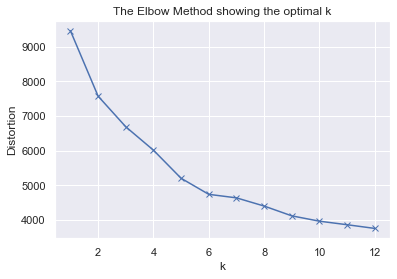

In [11]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,13)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_f)
    kmeanModel.fit(df_f)
    distortions.append(sum(np.min(cdist(df_f, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

 

In [108]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df_f)
 
print(label)

[0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 2 0 0 1 0 0 1 1 0 0 1 1 2 1 2 1 0
 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 2 0 1 2 0 0 0 0 1 2 0 2 0 0 0 1 0 1 0
 1 0 0 1 0 1 1 0 1 0 1 0 0 2 0 2 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 2 1 0
 0 0 1 1 0 2 0 2 0 2 0 0 2 0 0 0 0 1 1 0 0 1 0 0 0 2 0 0 0 2 1 0 1 1 0 1 0
 1 3 0 2 0 2 0 0 0 0 2 0 1 3 0 0 0 0 0 1 0 0 0 2 0 0 2 0 0 3 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 2 0 1 0 0 0 0 0 2 0 0 1 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 2 2 0 0 0 0 0 1 2 2 3 2 0 1 0 0 0 2 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 3 0 2 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 3 0 0 1 2 0 0 0
 1 1 1 1 1 0 0 0 0 1 0 0 1 0 2 1 0 1 0 0 1 0 1 0 1 2 1 1 0 0 1 2 0 1 0 2 1
 0 3 1 0 0 0 1 0 1 0 0 0 1 0 0 1 2 1 2 2 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 2 3 0 0 0 0 0 0 3 0 0 0 0 2 1 2 0 0 0 2 0 0 0 1 0 1 0 0 2 1 2 0 1 0
 0 0 1 2 0 1 0 2 0 1 3 1 1 0 0 3 1 0 1 0 0 2 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 2 1 1 0 2 0 0 0 0 1 0 0 0 0 0 2 2 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 3 0 0 

In [13]:
df_f

,saving,credit,checking,num_savings_tran,num_credit_tran,num_checking_tran,SV_tran_amt,CC_tran_amt,CH_tran_amt,AVG_savings_amt,AVG_credit_amt,AVG_checking_amt,Total_AVG_tran_amt
cust_id,,,,,,,,,,,,,
1362691,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000
1362487,12.89,1548.23,1401.21,19.0,32.0,52.0,887.52,4773.21,3244.83,46.711579,149.162813,62.400577,86.461748
1363160,122.54,286.69,0.00,48.0,68.0,0.0,2662.22,12506.95,0.00,55.462917,183.925735,0.000000,130.768707
1362752,609.33,0.00,3.76,12.0,15.0,93.0,9.07,6182.65,12086.71,0.755833,412.176667,129.964624,152.320250
1362548,254.02,68.68,569.65,12.0,22.0,99.0,3.78,15089.99,16817.43,0.315000,685.908636,169.873030,239.933835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363324,0.00,0.00,2325.37,0.0,0.0,44.0,0.00,0.00,3093.48,0.000000,0.000000,70.306364,70.306364
1362895,96.25,1300.00,0.00,28.0,27.0,0.0,1410.77,3425.69,0.00,50.384643,126.877407,0.000000,87.935636
1362569,0.00,9200.00,46.48,0.0,28.0,99.0,0.00,9200.00,16219.81,0.000000,328.571429,163.836465,200.155984


In [14]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [15]:
from sklearn.preprocessing import RobustScaler
X=df_f
transformer = RobustScaler().fit(X)
scaled_df=transformer.transform(X)

In [16]:
df_f[label == 2]

,saving,credit,checking,num_savings_tran,num_credit_tran,num_checking_tran,SV_tran_amt,CC_tran_amt,CH_tran_amt,AVG_savings_amt,AVG_credit_amt,AVG_checking_amt,Total_AVG_tran_amt
cust_id,,,,,,,,,,,,,
1362548,254.02,68.68,569.65,12.0,22.0,99.0,3.78,15089.99,16817.43,0.315000,685.908636,169.873030,239.933835
1362546,991.01,1292.63,84.83,26.0,84.0,99.0,1231.16,17114.03,9321.18,47.352308,203.738452,94.153333,132.374976
1362954,0.00,1226.12,301.79,0.0,44.0,99.0,0.00,15461.50,16212.34,0.000000,351.397727,163.761010,221.495385
1363076,0.00,770.56,67.30,0.0,40.0,99.0,0.00,22161.17,14949.44,0.000000,554.029250,151.004444,266.982806
1362525,313.46,1051.01,95.53,39.0,98.0,99.0,2770.85,20201.42,5220.71,71.047436,206.136939,52.734444,119.461780
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363345,0.00,2700.00,2345.06,0.0,45.0,99.0,0.00,18992.16,14726.27,0.000000,422.048000,148.750202,234.155764
1362937,0.00,0.00,377.30,0.0,40.0,99.0,0.00,16045.88,15940.51,0.000000,401.147000,161.015253,230.117914
1362508,255.11,1072.17,75.11,33.0,87.0,99.0,2749.01,17769.22,9117.73,83.303333,204.243908,92.098283,135.324018


In [17]:
df_f.saving

cust_id
1362691      0.00
1362487     12.89
1363160    122.54
1362752    609.33
1362548    254.02
            ...  
1363324      0.00
1362895     96.25
1362569      0.00
1363364      0.00
1363303      0.00
Name: saving, Length: 747, dtype: float64

In [28]:
import plotly.graph_objects as go

categories = ['AVG_savings_amt','AVG_credit_amt','AVG_checking_amt','Total_AVG_tran_amt']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[df_f[label==0][i].sum()/df_f[i].sum() for i in categories],
      theta=categories,
      fill='toself',
      name='cluster0'
))
fig.add_trace(go.Scatterpolar(
      r=[df_f[label==1][i].sum()/df_f[i].sum() for i in categories],
      theta=categories,
      fill='toself',
      name='cluster1'
))


fig.add_trace(go.Scatterpolar(
      r=[df_f[label==2][i].sum()/df_f[i].sum() for i in categories],
      theta=categories,
      fill='toself',
      name='cluster2'
))





fig.add_trace(go.Scatterpolar(
      r=[df_f[label==3][i].sum()/df_f[i].sum() for i in categories],
      theta=categories,
      fill='toself',
      name='cluster3'
))










fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
  showlegend=False
)

fig.show()

In [30]:
df_f.columns

Index(['saving', 'credit', 'checking', 'num_savings_tran', 'num_credit_tran',
       'num_checking_tran', 'SV_tran_amt', 'CC_tran_amt', 'CH_tran_amt',
       'AVG_savings_amt', 'AVG_credit_amt', 'AVG_checking_amt',
       'Total_AVG_tran_amt'],
      dtype='object')

In [109]:
import plotly.graph_objects as go

categories = ['saving','num_savings_tran','SV_tran_amt','AVG_savings_amt', 'checking','num_checking_tran','CH_tran_amt','AVG_checking_amt'   ,       'credit','num_credit_tran','CC_tran_amt','AVG_credit_amt'
             ,'Total_AVG_tran_amt']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[df_f[label==0][i].sum()/df_f[i].sum() for i in categories],
      theta=categories,
      fill='toself',
      name='cluster0'
))
fig.add_trace(go.Scatterpolar(
      r=[df_f[label==1][i].sum()/df_f[i].sum() for i in categories],
      theta=categories,
      fill='toself',
      name='cluster1'
))
fig.add_trace(go.Scatterpolar(
      r=[df_f[label==2][i].sum()/df_f[i].sum() for i in categories],
      theta=categories,
      fill='toself',
      name='cluster2'
))
fig.add_trace(go.Scatterpolar(
      r=[df_f[label==3][i].sum()/df_f[i].sum() for i in categories],
      theta=categories,
      fill='toself',
      name='cluster3'
))
fig.add_trace(go.Scatterpolar(
      r=[df_f[label==4][i].sum()/df_f[i].sum() for i in categories],
      theta=categories,
      fill='toself',
      name='cluster4'
))
fig.update_layout(width=1500,
    height=1500,
    
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
  showlegend=True
)

fig.show()

In [57]:
df_f

,saving,credit,checking,num_savings_tran,num_credit_tran,num_checking_tran,SV_tran_amt,CC_tran_amt,CH_tran_amt,AVG_savings_amt,AVG_credit_amt,AVG_checking_amt,Total_AVG_tran_amt
cust_id,,,,,,,,,,,,,
1362691,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000
1362487,12.89,1548.23,1401.21,19.0,32.0,52.0,887.52,4773.21,3244.83,46.711579,149.162813,62.400577,86.461748
1363160,122.54,286.69,0.00,48.0,68.0,0.0,2662.22,12506.95,0.00,55.462917,183.925735,0.000000,130.768707
1362752,609.33,0.00,3.76,12.0,15.0,93.0,9.07,6182.65,12086.71,0.755833,412.176667,129.964624,152.320250
1362548,254.02,68.68,569.65,12.0,22.0,99.0,3.78,15089.99,16817.43,0.315000,685.908636,169.873030,239.933835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363324,0.00,0.00,2325.37,0.0,0.0,44.0,0.00,0.00,3093.48,0.000000,0.000000,70.306364,70.306364
1362895,96.25,1300.00,0.00,28.0,27.0,0.0,1410.77,3425.69,0.00,50.384643,126.877407,0.000000,87.935636
1362569,0.00,9200.00,46.48,0.0,28.0,99.0,0.00,9200.00,16219.81,0.000000,328.571429,163.836465,200.155984


In [ ]:
from sklearn.preprocessing import RobustScaler
rb_scaler = =RobustScaler()
scaled_df = rb_scaler.fit_transform(df)
pca = PCA(n_components = 13)
pca_df = pca.fit_transform(scaled_df)

In [38]:
from sklearn.preprocessing import RobustScaler
X=df_f
transformer = RobustScaler().fit(X)
scaled_df=transformer.transform(X)



In [39]:
# Find the first 75 principle components of the dataset
pca = PCA(n_components=13)
pca.fit(scaled_df)

# Transform the data to its low-dimensional representation
reduced_faces = pca.transform(scaled_df)
print('Low-dimensional dataset shape: {}'.format(reduced_faces.shape))

Low-dimensional dataset shape: (747, 13)


Text(0, 0.5, '% Cumulative explained variance')

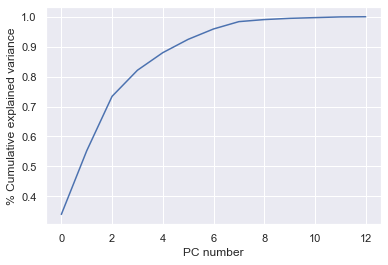

In [40]:
# See how well PCs explain variance in the dataset
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_explained_variance)
plt.xlabel('PC number')
plt.ylabel('% Cumulative explained variance')

In [43]:
pca = PCA(n_components=7)
pca.fit(scaled_df)

# Transform the data to its low-dimensional representation
reduced_faces = pca.transform(scaled_df)
print('Low-dimensional dataset shape: {}'.format(reduced_faces.shape))

Low-dimensional dataset shape: (747, 7)


In [44]:
reduced_faces

array([[-2.61281576, -0.27093308, -0.42575668, ...,  0.02138104,
         0.26454879,  0.31016979],
       [ 0.48242959,  1.73834043, -1.33043626, ..., -0.885525  ,
        -0.15851227,  0.76279225],
       [-0.78799513, -0.38648381,  0.85948647, ..., -0.15591158,
        -1.15381761,  0.9146355 ],
       ...,
       [ 0.7988663 ,  1.81254697,  2.10531538, ..., -4.87881083,
         2.3593416 ,  0.51203774],
       [-0.37861457,  1.16941476,  0.77550573, ..., -0.76351165,
         0.76029562, -0.51194269],
       [-1.08847497,  0.62643354,  0.76056404, ..., -0.22023339,
         0.5252543 , -0.69545842]])

In [58]:
df_f[(df_f.saving!=0)&(label==0)]

,saving,credit,checking,num_savings_tran,num_credit_tran,num_checking_tran,SV_tran_amt,CC_tran_amt,CH_tran_amt,AVG_savings_amt,AVG_credit_amt,AVG_checking_amt,Total_AVG_tran_amt
cust_id,,,,,,,,,,,,,
1362487,12.89,1548.23,1401.21,19.0,32.0,52.0,887.52,4773.21,3244.83,46.711579,149.162813,62.400577,86.461748
1363160,122.54,286.69,0.00,48.0,68.0,0.0,2662.22,12506.95,0.00,55.462917,183.925735,0.000000,130.768707
1362752,609.33,0.00,3.76,12.0,15.0,93.0,9.07,6182.65,12086.71,0.755833,412.176667,129.964624,152.320250
1362548,254.02,68.68,569.65,12.0,22.0,99.0,3.78,15089.99,16817.43,0.315000,685.908636,169.873030,239.933835
1363017,2901.35,1000.00,147.15,24.0,63.0,99.0,1840.05,10172.72,10057.28,76.668750,161.471746,101.588687,118.656183
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362529,873.14,433.43,1007.92,21.0,39.0,99.0,2331.08,7634.33,11649.08,111.003810,195.752051,117.667475,135.940189
1362508,255.11,1072.17,75.11,33.0,87.0,99.0,2749.01,17769.22,9117.73,83.303333,204.243908,92.098283,135.324018
1363038,508.26,1800.00,459.03,33.0,24.0,99.0,5056.67,3032.57,7243.22,153.232424,126.357083,73.163838,98.285000


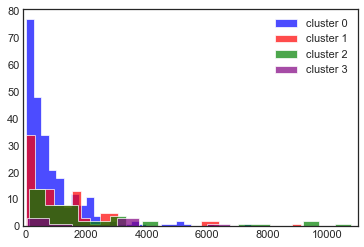

In [104]:
x1 = df_f[(df_f.saving!=0)&(label==0)].saving
x2 = df_f[(df_f.saving!=0)&(label==1)].saving
x3 = df_f[(df_f.saving!=0)&(label==2)].saving
x4 = df_f[(df_f.saving!=0)&(label==3)].saving


kwargs = dict(histtype='stepfilled', alpha=0.7, bins=30)

plt.hist(x1, **kwargs ,color='blue' ,label='cluster 0')
plt.hist(x2, **kwargs ,color='red',label='cluster 1')
plt.hist(x3, **kwargs ,color='green',label='cluster 2')
plt.hist(x4, **kwargs ,color='purple',label='cluster 3')
plt.xlim(xmin=-100, xmax = 11000)
plt.legend(loc="upper right")

In [94]:
df_f[(df_f.saving!=0)].saving.describe()

count      421.000000
mean      1258.060736
std       2054.680311
min          2.740000
25%        254.020000
50%        619.050000
75%       1535.830000
max      22432.780000
Name: saving, dtype: float64

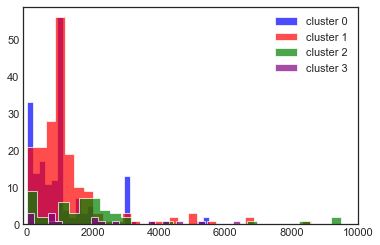

In [103]:
x1 = df_f[(df_f.credit!=0)&(label==0)].credit
x2 = df_f[(df_f.credit!=0)&(label==1)].credit
x3 = df_f[(df_f.credit!=0)&(label==2)].credit
x4 = df_f[(df_f.credit!=0)&(label==3)].credit


kwargs = dict(histtype='stepfilled', alpha=0.7, bins=30)

plt.hist(x1, **kwargs ,color='blue' ,label='cluster 0')
plt.hist(x2, **kwargs ,color='red',label='cluster 1')
plt.hist(x3, **kwargs ,color='green',label='cluster 2')
plt.hist(x4, **kwargs ,color='purple',label='cluster 3')
plt.xlim(xmin=-100, xmax = 10000)
plt.legend(loc="upper right")